# 2.1 머신러닝 알고리즘 - LR, DT, RF
- Linear Regression
- Decision Tree
- Random Forests
- Logistic Regression (for Categorical Target)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# to set data path
dataPath = 'C:/YONG/m1710/myPydata/'

### 선형회귀분석

In [3]:
# For Linear Regression, Load Sample Data

from pandas import DataFrame

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

print(df.shape)
df.head()


(24, 5)


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [4]:
#  다음달의 지수를 예측하는 구성으로 구조 변경

nd_SIP = np.array(df.Stock_Index_Price[1:]) # SIP of the next month
df = df.head(23)
df['Stock_Index_Price'] = nd_SIP
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1394
1,2017,11,2.50,5.3,1357
2,2017,10,2.50,5.3,1293
3,2017,9,2.50,5.3,1256
4,2017,8,2.50,5.4,1254


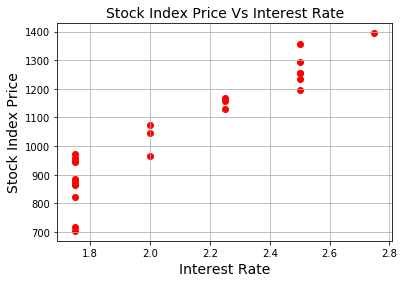

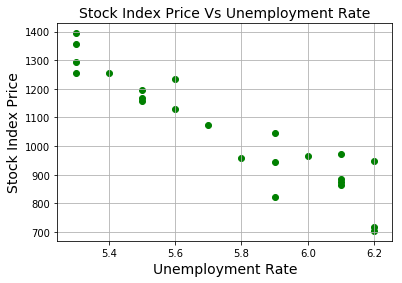

In [6]:
# 시각적인 linearity check

plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

### 단순선형회귀분석 (Simple Linear Regression)

Intercept:   -48.116700201207095
Coefficients:   527.5975855130785


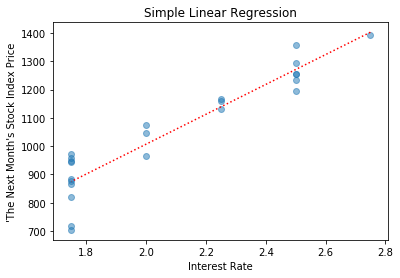

In [17]:
# Simple Linear Regression

from pandas import DataFrame
from sklearn import linear_model

X = df[['Interest_Rate']]
# 독립변수의 리스트로 정의. 
# 하지만, 내용물은 하나 뿐이기에 단순선형회귀분석
Y = df['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:  ', regr.intercept_)
print('Coefficients:  ', regr.coef_[0]) 
# 리스트이기 때문에 0번 요소를 출력해야 숫자

# make predictions - back test
predictions = regr.predict(X)


# 시각적으로 선형회귀분석 결과 확인
plt.scatter(X,Y,  alpha=0.5)
plt.plot(X,predictions, color='red', linestyle=':')
plt.xlabel('Interest Rate')
plt.ylabel("'The Next Month's Stock Index Price")
plt.title('Simple Linear Regression')
plt.show()


#### [Quiz] Unemployment Rate에 대한 선형회귀분석을 실시하라

### 다중선형회귀분석 Multiple Linear Regression

In [22]:
from pandas import DataFrame
from sklearn import linear_model

X = df[['Interest_Rate','Unemployment_Rate']] 
# here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:  ', regr.intercept_)
print('Coefficients:  ', regr.coef_)


# prediction with new values
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('\nPredicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


Intercept:   2086.4847782457537
Coefficients:   [ 282.73906776 -281.83113322]

Predicted Stock Index Price: 
 [1370.3122085]


In [23]:
import statsmodels.api as sm

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# 회귀분석 결과의 출력
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     98.31
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           4.50e-11
Time:                        11:25:21   Log-Likelihood:                -126.32
No. Observations:                  23   AIC:                             258.6
Df Residuals:                      20   BIC:                             262.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2086.4848    803.82

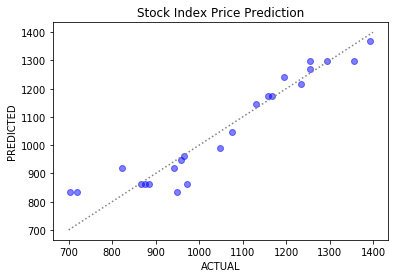

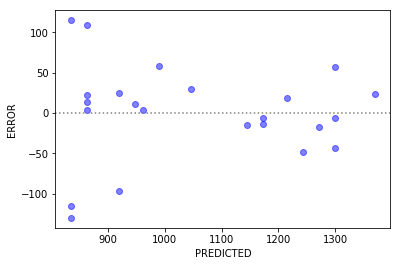

In [25]:
# investigate predictions

plt.scatter(Y, predictions, color='blue', alpha=0.5)
plt.plot([700,1400],[700,1400], 
         color='grey', linestyle=':')
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTED')
plt.title('Stock Index Price Prediction')
plt.show()

# Prediction - Error
# c.f. conventionally put predicted into Y-axis
plt.scatter(predictions, Y-predictions, color='blue', alpha=0.5)
plt.axhline(0, color='grey', linestyle=':')
plt.xlabel('PREDICTED')
plt.ylabel('ERROR')
plt.show()

- [WARNING] 실전에서 이렇게 초보적 단순한 방식은 초기용의 단순 참고용 정도로만 사용.

#### GUI used for the Multiple Linear Regression in Python

In [26]:
# ref :: https://datatofish.com/multiple-linear-regression-python/

from pandas import DataFrame
from sklearn import linear_model
import tkinter as tk 
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }


df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price'] # output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 


# tkinter GUI
root= tk.Tk() 
 
canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# with statsmodels
print_model = model.summary()
label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
canvas1.create_window(800, 220, window=label_model)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Unemployment Rate: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
# GUI object will pop up
root.mainloop()

Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]


### Load Virtual Customer Transaction Summary dataset

#### about Customer Transaction Summary dataset
- 가상적인 신용카드사 또는 종합쇼핑몰 의 거래내역을 기초 집계해서 생성한 데이터
- 카테고리들을 자신의 업종에 대입한다면 (상품군 - 예: 보험이라면 장기, 단기, 종합 등) 

In [2]:
dfc20 = pd.read_pickle(dataPath + 'dfc01.pkl')

list_feat = ['custid','age','amt_nike', 'amt_hnm','amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login',
             'amt_nxtyr', 'cnt_nxtyr']
dfc21 = dfc20[dfc20.sex=='F'][list_feat]
print(dfc21.shape)
dfc21.head()

(5000, 13)


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,cnt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr
0,1,27,25100,0,20000,0,0,0,0,4,15,185921,3
1,2,28,21500,0,21700,0,0,0,0,3,17,271796,8
2,3,27,0,0,20200,0,0,0,0,2,16,369348,3
3,4,27,0,0,0,0,0,0,0,2,10,387005,8
4,5,27,20100,0,34000,0,0,0,76700,4,22,204884,10


In [3]:
print('Column Descriptions\n=======================')
print(dfc21.columns)
print(['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액','프리미엄스니커즈구매액','구매건수','로그인건수','다음해구매금액','다음해구매건수'])

Column Descriptions
Index(['custid', 'age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login',
       'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액', '프리미엄스니커즈구매액', '구매건수', '로그인건수', '다음해구매금액', '다음해구매건수']


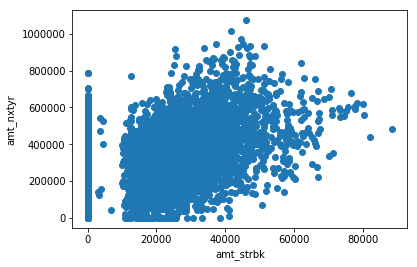

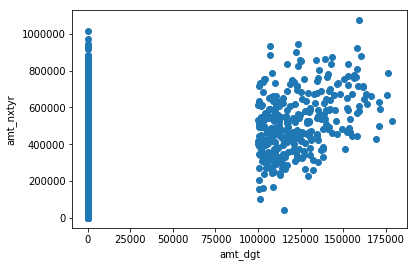

In [44]:
# EDA

plt.scatter(dfc21.amt_strbk, dfc21.amt_nxtyr)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nxtyr')
plt.show()

plt.scatter(dfc21.amt_dgt, dfc21.amt_nxtyr)
plt.xlabel('amt_dgt')
plt.ylabel('amt_nxtyr')
plt.show()

### [실습]
- 전년의 이용금액과 다음해의 이용금액간의 관계를 시각적으로 확인하라

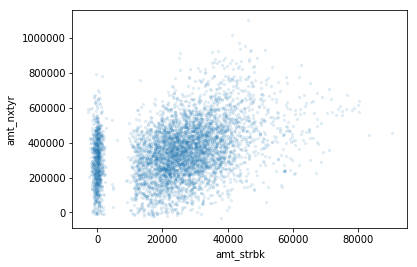

In [40]:
# 실전적인 EDA scatterplot

plt.scatter(rjitt(dfc21.amt_strbk), rjitt(Y), 
            alpha=0.1, s=5)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nxtyr')
plt.show()

# Linear Relationship?

[Remember!]
- 실전에서는 데이터의 양이 많아서 많은 수의 점을 표시해야한다
- 점들이 겹치는 경우가 흔하다
- 밀도를 파악하는 것도 중요하다

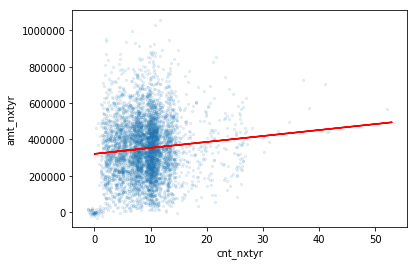

correlation =  0.08767


In [38]:
# 실전적인 EDA scatterplot

from sklearn import linear_model

regr = linear_model.LinearRegression()
X, Y = dfc21[['cnt_nxtyr']],dfc21.amt_nxtyr
regr.fit(X, Y)
predictions = regr.predict(X)

plt.scatter(rjitt(dfc21.cnt_nxtyr), rjitt(Y), 
            alpha=0.1, s=5)
plt.plot(X, predictions, color='red')
plt.xlabel('cnt_nxtyr')
plt.ylabel('amt_nxtyr')
plt.show()

print('correlation = ', round(np.corrcoef(dfc21.cnt_nxtyr, dfc21.amt_nxtyr)[0,1],5))
# Linear Relationship?

### [실습] 
- Customer Transaction Summary 의 다음해 구매금액을 예측하는 다중선형회귀분석을 실시

### Decision Tree

['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl', 'amt_prmmsneakers']

DT Predicting  amt_nxtyr   : 


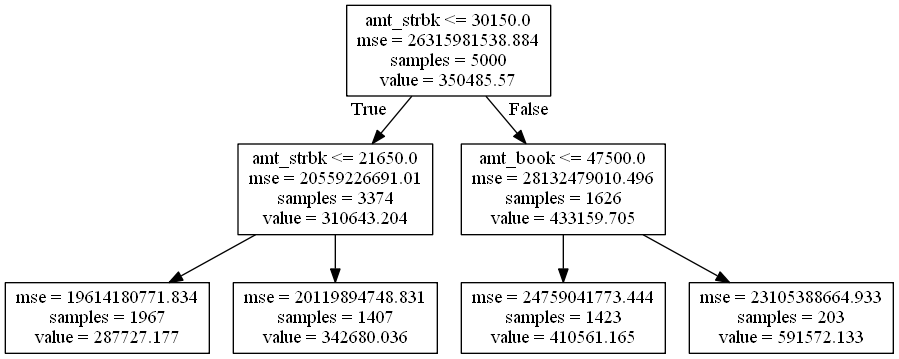

In [41]:
from sklearn.tree import DecisionTreeRegressor

# 사용할 독립변수와 종속변수 정의
dtfeatures = [elem for elem in list_feat if elem not in ['custid', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr']]
print(dtfeatures)
tgt = 'amt_nxtyr'

dfdt = dfc21.copy()

dt1 = DecisionTreeRegressor(min_samples_split=30, 
                            max_depth=2, 
                            min_samples_leaf=10, 
                            random_state=99)
dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
# graphviz 가 존재하는 path를 정확하게 지정해 주어야 DT 플롯 생성됨

import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

print('\nDT Predicting ',tgt, '  : ')
# Show graph
Image(graph.create_png())

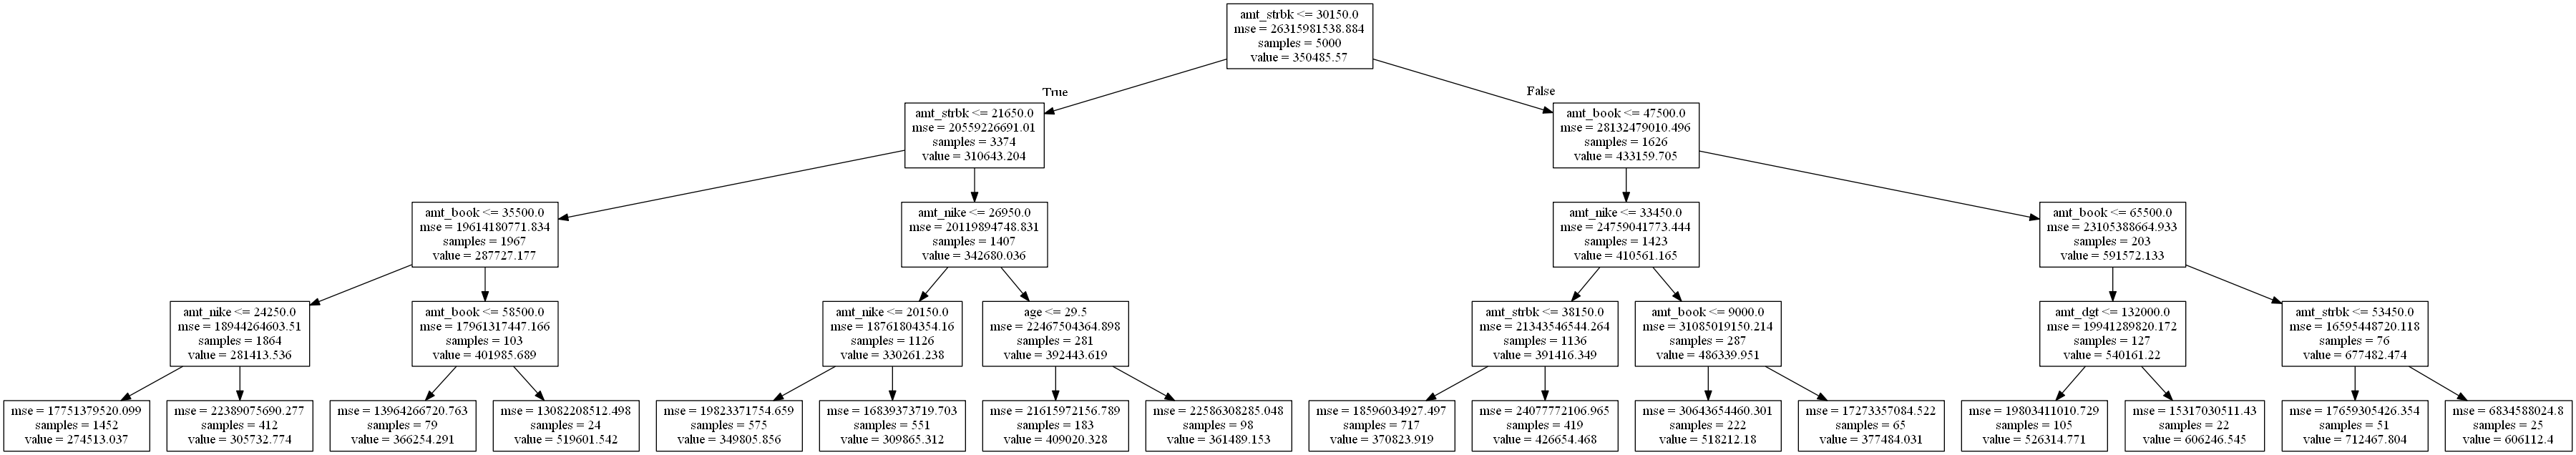

In [42]:
# bush tree

from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(min_samples_split=30, max_depth=4, min_samples_leaf=10, random_state=99)

dtfeatures = [elem for elem in list_feat if elem not in ['custid', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr']]
tgt = 'amt_nxtyr'

dfdt = dfc21

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

[ 추가 dataset]
- Medical Cost Personal Datasets
- Insurance Forecast using Linear Regression - https://www.kaggle.com/mirichoi0218/insurance 
- https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset

<font color='blue'><br>
- Credit Card Default Prediction dataset :: 
- https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/downloads/default-of-credit-card-clients-dataset.zip/1</font>
 

In [77]:
# Medical Cost Personal Datasets

dfi01 = pd.read_csv(dataPath + 'insurance_charge.csv')
print(dfi01.shape)
dfi01.head()


(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


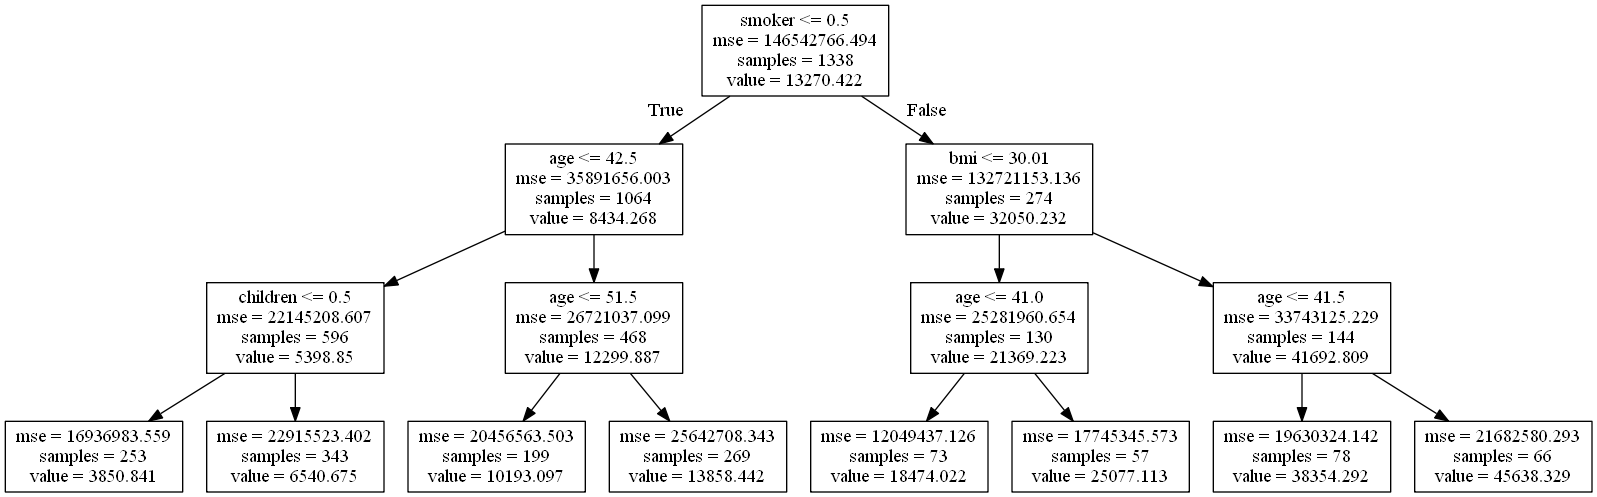

In [59]:
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(min_samples_split=30, max_depth=3, min_samples_leaf=10, random_state=99)


dtfeatures = ['age', 'sex', 'bmi', 'children', 'smoker']
tgt = 'charges'

dfdt = dfi01.copy()
# 카테고리형 변수를 수치형 변수로 코딩 변경
dfdt['sex'] = np.where(dfdt.sex=='male',1,0)
dfdt['smoker'] = np.where(dfdt.smoker=='yes',1,0)

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

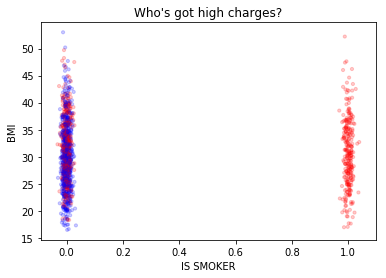

In [58]:
colors1 = ['red' if x > dfdt.charges.median() else 'blue' for x in dfdt.charges]
plt.scatter(rjitt(dfdt.smoker), rjitt(dfdt.bmi), alpha=0.2, s=10,
           color=colors1)
plt.xlabel('IS SMOKER')
plt.ylabel('BMI')
plt.title("Who's got high charges?")
plt.show()

### Random Forests

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


r-squared : 0.834646352592084


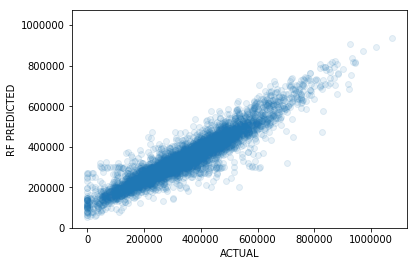

Training MAE:  49838.23633719685


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [396]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0,
                                  oob_score=False, verbose=2)
regressor.fit(dfdt[dtfeatures], dfdt[tgt])
y_pred = regressor.predict(dfdt[dtfeatures])

print('r-squared :', regressor.score(dfdt[dtfeatures], dfdt[tgt], sample_weight=None))

plt.scatter(dfdt[tgt],y_pred, alpha=0.1)
plt.ylim(0,dfdt[tgt].max())
plt.xlabel('ACTUAL')
plt.ylabel('RF PREDICTED')
plt.show()

# Compute MAE
y_rf_pred = regressor.predict(dfdt[dtfeatures])
print('Training MAE: ', np.mean(np.abs(dfdt[tgt] - y_rf_pred)))

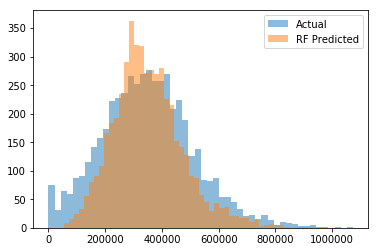

In [362]:
plt.hist(dfdt[tgt], bins=50, alpha=0.5)
plt.hist(y_pred, bins=50, alpha=0.5)
plt.legend(['Actual', 'RF Predicted'])
plt.show()

### CatBoost

In [404]:
from catboost import CatBoostRegressor

cbmodel = CatBoostRegressor(iterations=3000, learning_rate=1,
                           eval_metric='R2', # [ RMSE , R2 ]
                            loss_function='RMSE',
                           use_best_model=True,
                           random_seed=0,
                            # max_depth=4, 
                           depth=6,
                           bagging_temperature = 0.2,
                             metric_period = 25)

dfdt = dfc21.copy()                               
train_x = dfdt[dtfeatures] 
tgt = 'amt_nxtyr'
train_y = dfdt[tgt]

cbmodel.fit(
    train_x, train_y,
    # cat_features=categorical_features_indices,
    # verbose=True,  # you can uncomment this for text output
    plot=True, # does not work for classifier
    eval_set=(train_x, train_y)    
)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1248958	test: 0.1248958	best: 0.1248958 (0)	total: 60ms	remaining: 2m 59s
25:	learn: 0.3094225	test: 0.3094225	best: 0.3094225 (25)	total: 999ms	remaining: 1m 54s
50:	learn: 0.3363588	test: 0.3363588	best: 0.3363588 (50)	total: 2.27s	remaining: 2m 11s
75:	learn: 0.3414745	test: 0.3414745	best: 0.3414745 (75)	total: 3.18s	remaining: 2m 2s
100:	learn: 0.3550364	test: 0.3550364	best: 0.3550364 (100)	total: 4.24s	remaining: 2m 1s
125:	learn: 0.3678969	test: 0.3678969	best: 0.3678969 (125)	total: 5.25s	remaining: 1m 59s
150:	learn: 0.3753144	test: 0.3753144	best: 0.3753144 (150)	total: 6.34s	remaining: 1m 59s
175:	learn: 0.3779510	test: 0.3779510	best: 0.3779510 (175)	total: 7.36s	remaining: 1m 58s
200:	learn: 0.3787320	test: 0.3787320	best: 0.3787320 (200)	total: 8.39s	remaining: 1m 56s
225:	learn: 0.3797087	test: 0.3797087	best: 0.3797087 (225)	total: 9.22s	remaining: 1m 53s
250:	learn: 0.3804000	test: 0.3804000	best: 0.3804000 (250)	total: 10.2s	remaining: 1m 51s
275:	learn: 

<Figure size 432x288 with 0 Axes>

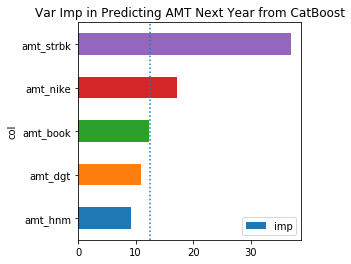

,col,imp,cum_sum_imp
3,amt_strbk,36.97,36.97
1,amt_nike,17.13,54.10
5,amt_book,12.36,66.46
4,amt_dgt,11.01,77.47
2,amt_hnm,9.22,86.69
row_total,amt_hnmamt_dgtamt_bookamt_nikeamt_strbk,86.69,NaN


In [405]:
# Mapping Feature Importance

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': train_x.columns})
fea_imp['imp'] = round(fea_imp.imp, 2)
mean_vimp = fea_imp.imp.mean()
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-5:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AMT Next Year from CatBoost')
plt.axvline(mean_vimp, linestyle=':')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

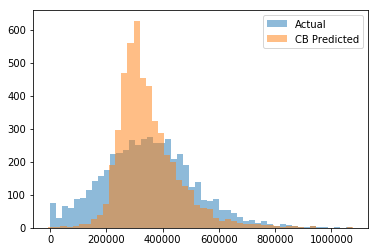

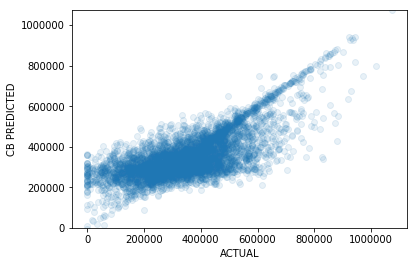

Training MAE:  85949.86643122976


In [406]:
y_cb_pred = cbmodel.predict(train_x)

plt.hist(train_y, bins=50, alpha=0.5)
plt.hist(y_cb_pred, bins=50, alpha=0.5)
plt.legend(['Actual', 'CB Predicted'])
plt.show()

plt.scatter(train_y, y_cb_pred, alpha=0.1)
plt.ylim(0,train_y.max())
plt.xlabel('ACTUAL')
plt.ylabel('CB PREDICTED')
plt.show()

# Compute MAE
y_cb_pred = cbmodel.predict(train_x)
print('Training MAE: ', np.mean(np.abs(train_y - y_cb_pred)))

#### 10 fold cross validation of Catboost

In [202]:

from catboost import Pool, cv

# cat_features = [0]

cv_dataset = Pool(data=train_x,
                  # cat_features=cat_features, 
                  label=train_y)
                  

params = {"iterations": 300,
          "depth": 3,
          "loss_function": "RMSE",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=10, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Classification Type Formulation

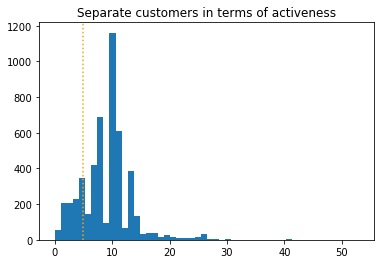

(1037, 13)

In [204]:
# check target distribution

plt.hist(dfc21.cnt_nxtyr, bins=50)
plt.axvline(5, color='orange', linestyle=':')
plt.title('Separate customers in terms of activeness')
plt.show()

dfc21[dfc21.cnt_nxtyr<=5].shape

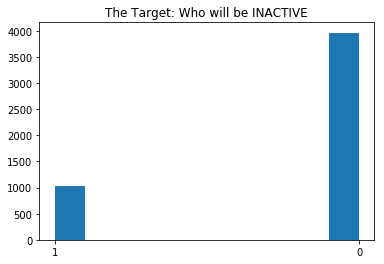

In [213]:
tgt_label_cnt = np.where(dfc21.cnt_nxtyr<=5, '1', '0')         
plt.hist(tgt_label_cnt)
plt.title('The Target: Who will be INACTIVE')
plt.show()

# predicting defection in terms of trx count in the next year

### Decision Tree Classifier

Count of nulls : 
 custid              0
age                 0
amt_nike            0
amt_hnm             0
amt_strbk           0
amt_dgt             0
amt_book            0
amt_htl             0
amt_prmmsneakers    0
cnt_pstyr           0
cnt_login           0
amt_nxtyr           0
cnt_nxtyr           0
dtype: int64


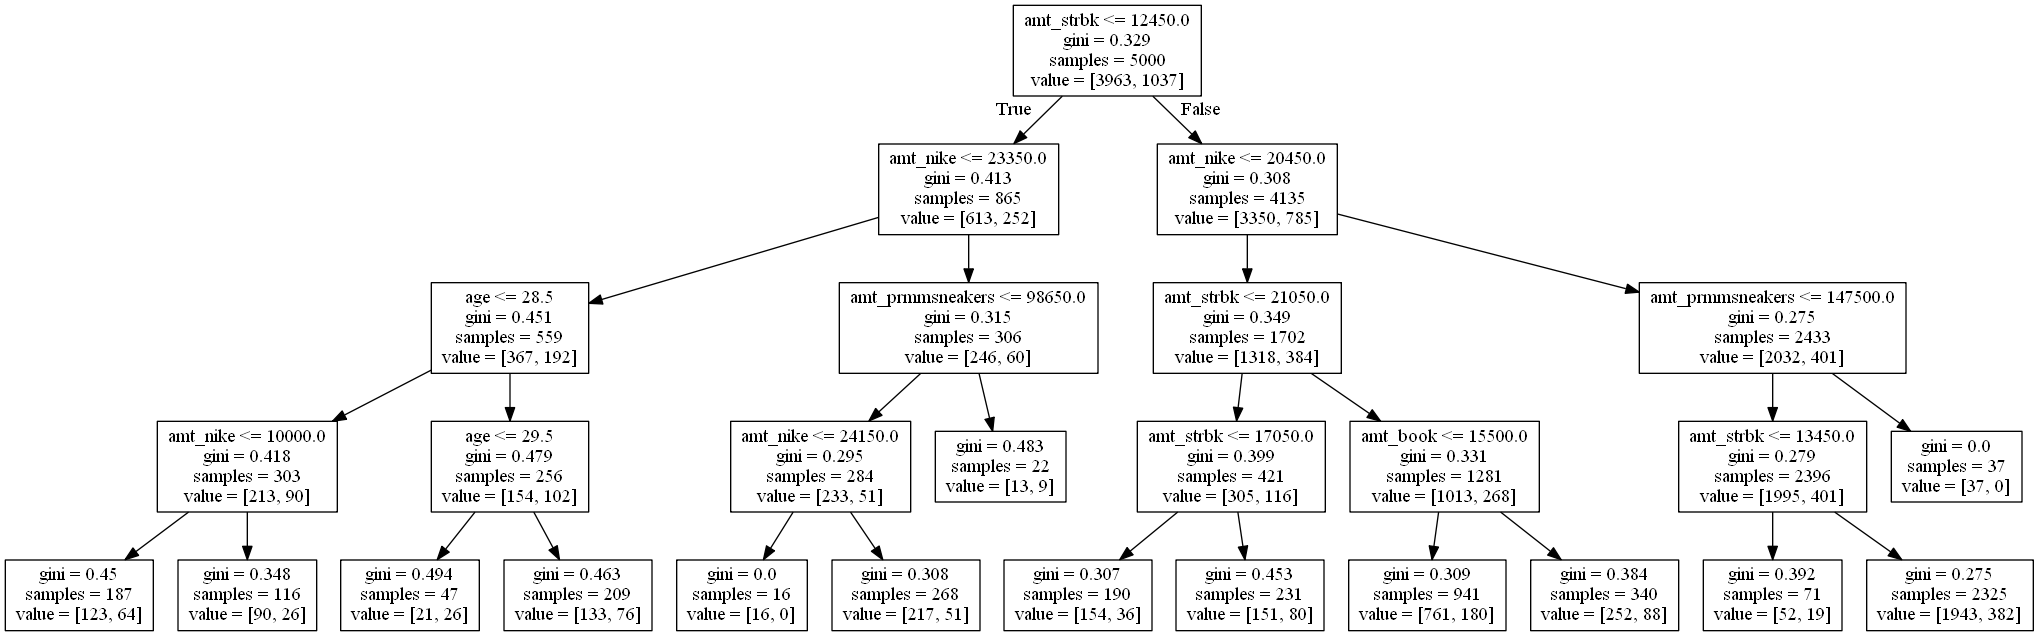

In [284]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(min_samples_split=30, max_depth=4, min_samples_leaf=10, random_state=99)

dtfeatures = [elem for elem in list_feat if elem not in ['custid', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr']]
tgt = tgt_label_cnt

dfdt = dfc21

# Check if there is any missing value
print('Count of nulls : \n', dfdt.isnull().sum())

dt1.fit(dfdt[dtfeatures], tgt)

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [215]:
# inference and evaluate 

y_pred=dt1.predict(dfdt[dtfeatures])

# confusion matrix

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(tgt, y_pred)
print(cnf_matrix)

accuracy = 100*(cnf_matrix[0][0] + cnf_matrix[1][1])/ cnf_matrix.sum()
print('accuracy % : ', accuracy)

# alternatively
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(tgt, y_pred) * 100
print('accuracy % : ', accuracy)

# RoC Chart


[[3942   21]
 [1011   26]]
accuracy % :  79.36
accuracy % :  79.36


# Use RF Classifier

In [236]:
# select numeric features only

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numcols = dfdt.select_dtypes(include=numerics).columns
dtfeatures = numcols.drop(['custid','amt_nxtyr', 'cnt_nxtyr'])
print(dtfeatures)
train_x = dfc21[dtfeatures]
train_y = tgt

# customerid and targets are to be eliminated from the predictor list


from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=100, random_state=0, verbose=2)
rfmodel.fit(train_x, train_y)
y_pred = rfmodel.predict(train_x)
y_pred[:10]

Index(['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book',
       'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login'],
      dtype='object')
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array(['1', '0', '1', '0', '0', '0', '0', '1', '1', '1'], dtype='<U1')

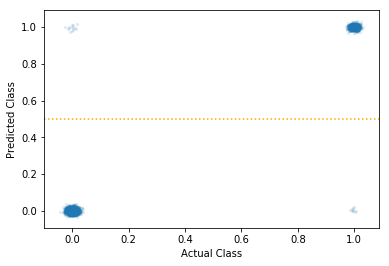

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[[0.27   0.73  ]
 [0.98   0.02  ]
 [0.17   0.83  ]
 [0.8575 0.1425]]


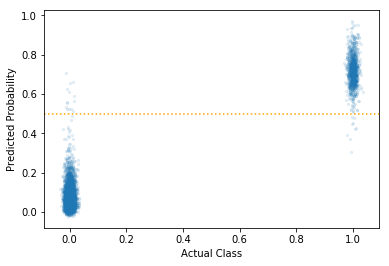

In [253]:
plt.scatter(rjitt(np.array(train_y).astype(int)), rjitt(np.array(y_pred).astype(int)), alpha=0.1, s=5)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.axhline(0.5, color='orange', linestyle=':')
plt.show()

y_predp = rfmodel.predict_proba(train_x)
print(y_predp[:4])

plt.scatter(rjitt(np.array(train_y).astype(int)), rjitt(y_predp[:,1]), alpha=0.1, s=5)
plt.axhline(0.5, color='orange', linestyle=':')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Probability')
plt.show()


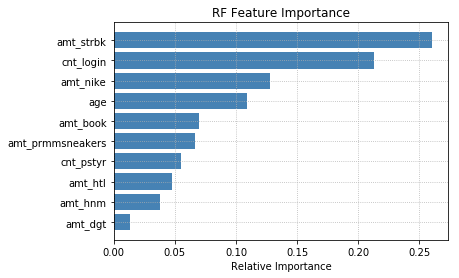

In [254]:
importances = rfmodel.feature_importances_
indices = np.argsort(importances)

plt.title('RF Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), [dtfeatures[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(linestyle=':')
plt.show()

# Use Logistic Regression

['0' '0' '0' '0']
[[0.80284602 0.19715398]
 [0.80322479 0.19677521]
 [0.73907163 0.26092837]
 [0.66651499 0.33348501]]
[0.19715398 0.19677521 0.26092837 ... 0.16699164 0.19860582 0.08445122]


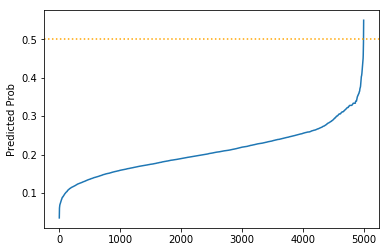

In [309]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(dfdt[dtfeatures], tgt)

y_pred = logreg.predict(dfdt[dtfeatures])
# predict probability
y_predprob=logreg.predict_proba(dfdt[dtfeatures])

# print predicted
print(y_pred[:4])
# print predicted
print(y_predprob[:4])
# print predicted prob of '1'
print(y_predprob[:,1])

plt.plot(np.sort(y_predprob[:,1]))
plt.axhline(0.5, color='orange', linestyle=':')
plt.ylabel('Predicted Prob')
plt.show()

In [310]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(tgt, y_pred)
print(cnf_matrix)

# alternatively
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(tgt, y_pred) * 100
print('accuracy % : ', accuracy)

[[3961    2]
 [1036    1]]
accuracy % :  79.24


['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl', 'amt_prmmsneakers']
AUC: 0.59


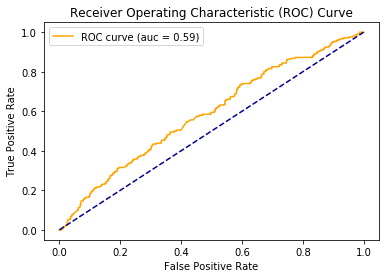

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[782   6]
 [212   0]]
PCNT accuracy = 78.20 


In [306]:
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

trainX, testX, trainy, testy = train_test_split(dfdt[dtfeatures], tgt, test_size=0.2, random_state=1)

model = DecisionTreeClassifier(min_samples_split=40, max_depth=4, min_samples_leaf=10, random_state=99)
model = LogisticRegression()
model = RandomForestClassifier(n_estimators=500, random_state=0, min_samples_leaf=30)
model = CatBoostClassifier(iterations=500, eval_metric='Accuracy', loss_function='CrossEntropy', depth=3, random_seed=42, verbose=False)
model.fit(trainX, trainy)

print(dtfeatures)

probs = model.predict_proba(testX)
preds = probs[:,1]

# preds = probs


auc = roc_auc_score(testy, preds)
print('AUC: %.2f' % auc)


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(testy.astype(int), preds)    
plot_roc_curve(fpr, tpr)



# import the metrics class
from sklearn import metrics
print(model.predict(testX)[:10])

cnf_matrix = metrics.confusion_matrix(testy, model.predict(testX).astype(int).astype(str))
print(cnf_matrix)


accuracy = accuracy_score(testy, model.predict(testX).astype(int).astype(str)) * 100
print('PCNT accuracy = %0.2f ' % accuracy)



- In CatBoost, min_data_in_leaf is a parameter for training not symmetric trees. 
- To use it you need to set tree growing strategy to other than Symmetric. Other growing policies are supported only on GPU now, we'll implement them on CPU at some point. 
- But in most cases default growing strategy works best, so you can try to use it.

#### CatBoost with Categorical Features

Index(['age', 'area', 'custid', 'renewed_memyrs', 'sex', 'ckey', 'ckey1',
       'amt_pstyr', 'ckey2', 'ckey3', 'ckey4', 'sex_cycle', 'height', 'weight',
       'cupsize', 'smoking', 'rto_nocon', 'sex_partners3m', 'amt_sextoy',
       'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_mtl', 'amt_beauty', 'amt_dgt',
       'amt_food', 'amt_book', 'education', 'marital', 'amt_prmmsneakers',
       'amt_htl', 'amt_selectCat', 'cnt_selectCats', 'amt_nxtyr', 'cnt_nxtyr',
       'cnt_pstyr', 'cnt_login'],
      dtype='object')
(5000, 16)
age                  int32
area                object
education           object
marital             object
amt_nike             int32
amt_hnm              int32
amt_strbk            int32
amt_dgt              int32
amt_book             int32
amt_htl              int32
amt_prmmsneakers     int32
cnt_pstyr            int64
cnt_login            int64
dtype: object
[1 2 3]
0:	learn: 0.7937500	total: 26.3ms	remaining: 13.1s
50:	learn: 0.7937500	total: 1.29s	remaining: 11.

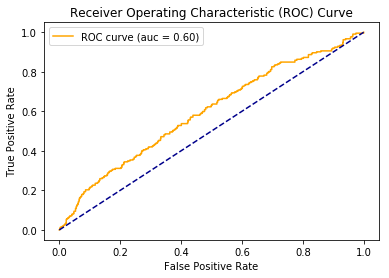

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[787   1]
 [212   0]]
PCNT accuracy = 78.70 


In [341]:
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

print(dfc20.columns)
list_featc = ['custid','age','area', 'education', 'marital', 'amt_nike', 'amt_hnm',
             'amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login',
             'amt_nxtyr', 'cnt_nxtyr']
dfc23 = dfc20[dfc20.sex=='F'][list_featc]
print(dfc23.shape)
dfc23.head()
dfdt = dfc23.copy()

dtfeatures = ['age','area', 'education', 'marital', 'amt_nike', 'amt_hnm',
             'amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login']

categorical_features_indices = np.where(dfdt[dtfeatures].dtypes ==np.object)[0]
print(dfdt[dtfeatures].dtypes)
print(categorical_features_indices)

trainX, testX, trainy, testy = train_test_split(dfdt[dtfeatures], tgt, test_size=0.2, random_state=1)

model = CatBoostClassifier(iterations=500, eval_metric='Accuracy', 
                           # loss_function='CrossEntropy', 
                           depth=3, random_seed=42, 
                          metric_period = 50)
model.fit(trainX, trainy, cat_features=categorical_features_indices)

print(dtfeatures)

probs = model.predict_proba(testX)
preds = probs[:,1]

# preds = probs


auc = roc_auc_score(testy, preds)
print('AUC: %.2f' % auc)


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(testy.astype(int), preds)    
plot_roc_curve(fpr, tpr)



# import the metrics class
from sklearn import metrics
print(model.predict(testX)[:10])

cnf_matrix = metrics.confusion_matrix(testy, model.predict(testX).astype(int).astype(str))
print(cnf_matrix)


accuracy = accuracy_score(testy, model.predict(testX).astype(int).astype(str)) * 100
print('PCNT accuracy = %0.2f ' % accuracy)


[ 추가 dataset]
- Credit Card Default Prediction dataset :: 
- https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/downloads/default-of-credit-card-clients-dataset.zip/1
 

(30000, 25)


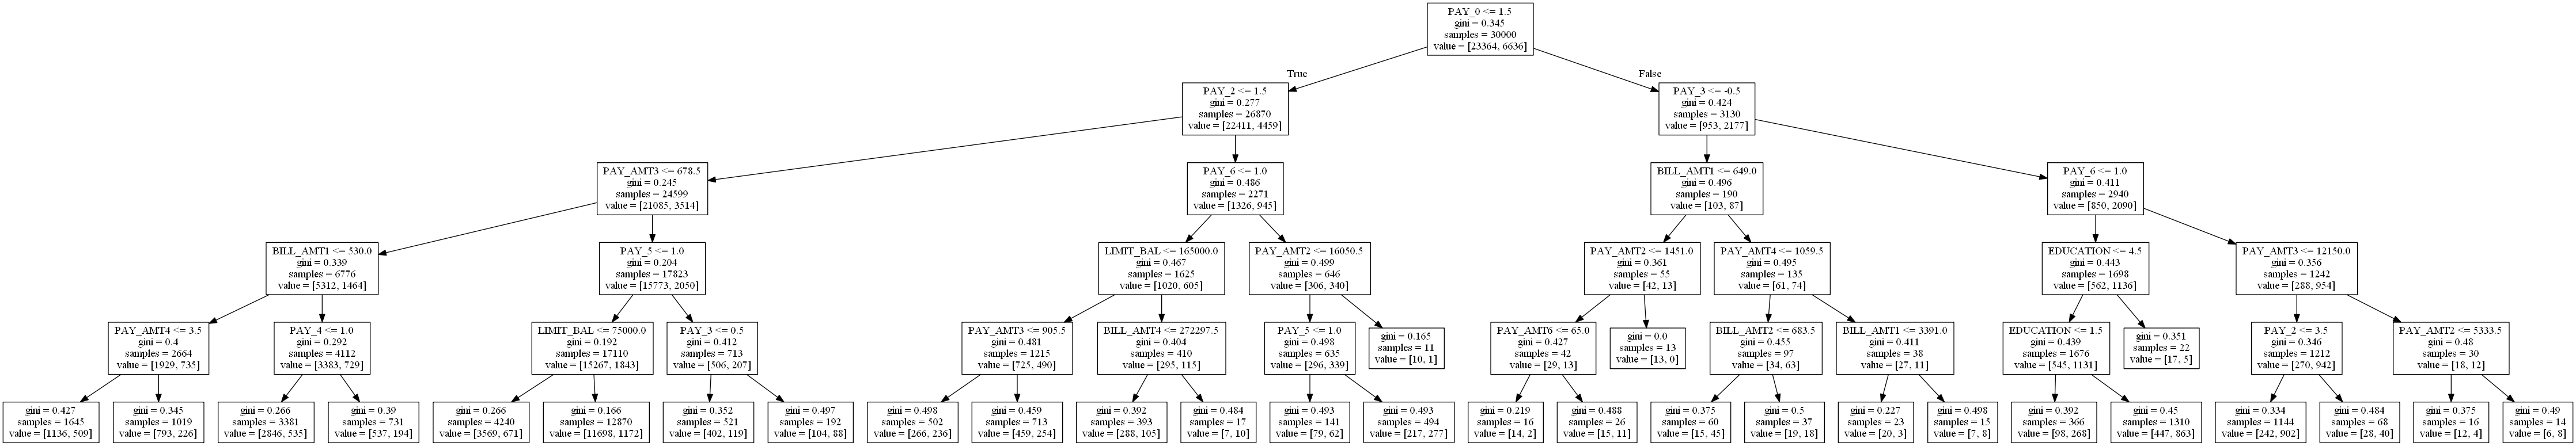

In [76]:
# Credit Card Default Prediction

dfcr01 = pd.read_csv(dataPath + 'UCI_credit_card.csv')
print(dfcr01.shape)
dfcr01.head()


from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(min_samples_split=30, max_depth=5, min_samples_leaf=10, random_state=99)


# dtfeatures = np.array(dfcr01.columns).drop(['ID', 'default.payment.next.month'])
cols = dfcr01.columns
dtfeatures = [x for x in cols if x not in ['ID', 'default.payment.next.month']]
tgt = 'default.payment.next.month'

dfdt = dfcr01.copy()

# 카테고리형 변수를 수치형 변수로 코딩 변경 (인코딩)

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())